In [1]:
import numpy as np
import pandas as pd
import math
import datetime
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter
import data_collecter_sohu as sohu_dc

In [2]:
# stock_list=['002024','002011','002347','002501','002594','002653','002444','002415','002527']
stock_list=['002024','002011','002347','002501','002594','002653','002444','002415','002527',
            '000400','002100','002500','600900','002600','603399','601688','600962','600500',
            '600406','600633','601058','002487','000651','000333','002200','600396','002196']
current_date=datetime.datetime.now()
date_span=datetime.timedelta(days=365)
date_from=current_date-date_span
current_date_str=current_date.strftime('%Y%m%d')
date_from_str=date_from.strftime('%Y%m%d')
print("%s---%s"%(date_from_str,current_date_str))

20170103---20180103


In [3]:
for stock in stock_list:
    df=sohu_dc.get_market_data(stock,date_from_str,current_date_str,False)
    csv_name='%s_%s.csv'%(stock,current_date_str)
    csv_path=os.path.join('/media/demon/DATA/workspace/code/git/python/stock/data',current_date_str,csv_name)
    df.to_csv(csv_path)

243 243 243
245 245 245
231 231 231
245 245 245
245 245 245
245 245 245
245 245 245
245 245 245
245 245 245
245 245 245
245 245 245
245 245 245
245 245 245
128 128 128
180 180 180
245 245 245
245 245 245
245 245 245
138 138 138
206 206 206
241 241 241
245 245 245
244 244 244
245 245 245
245 245 245
245 245 245
240 240 240


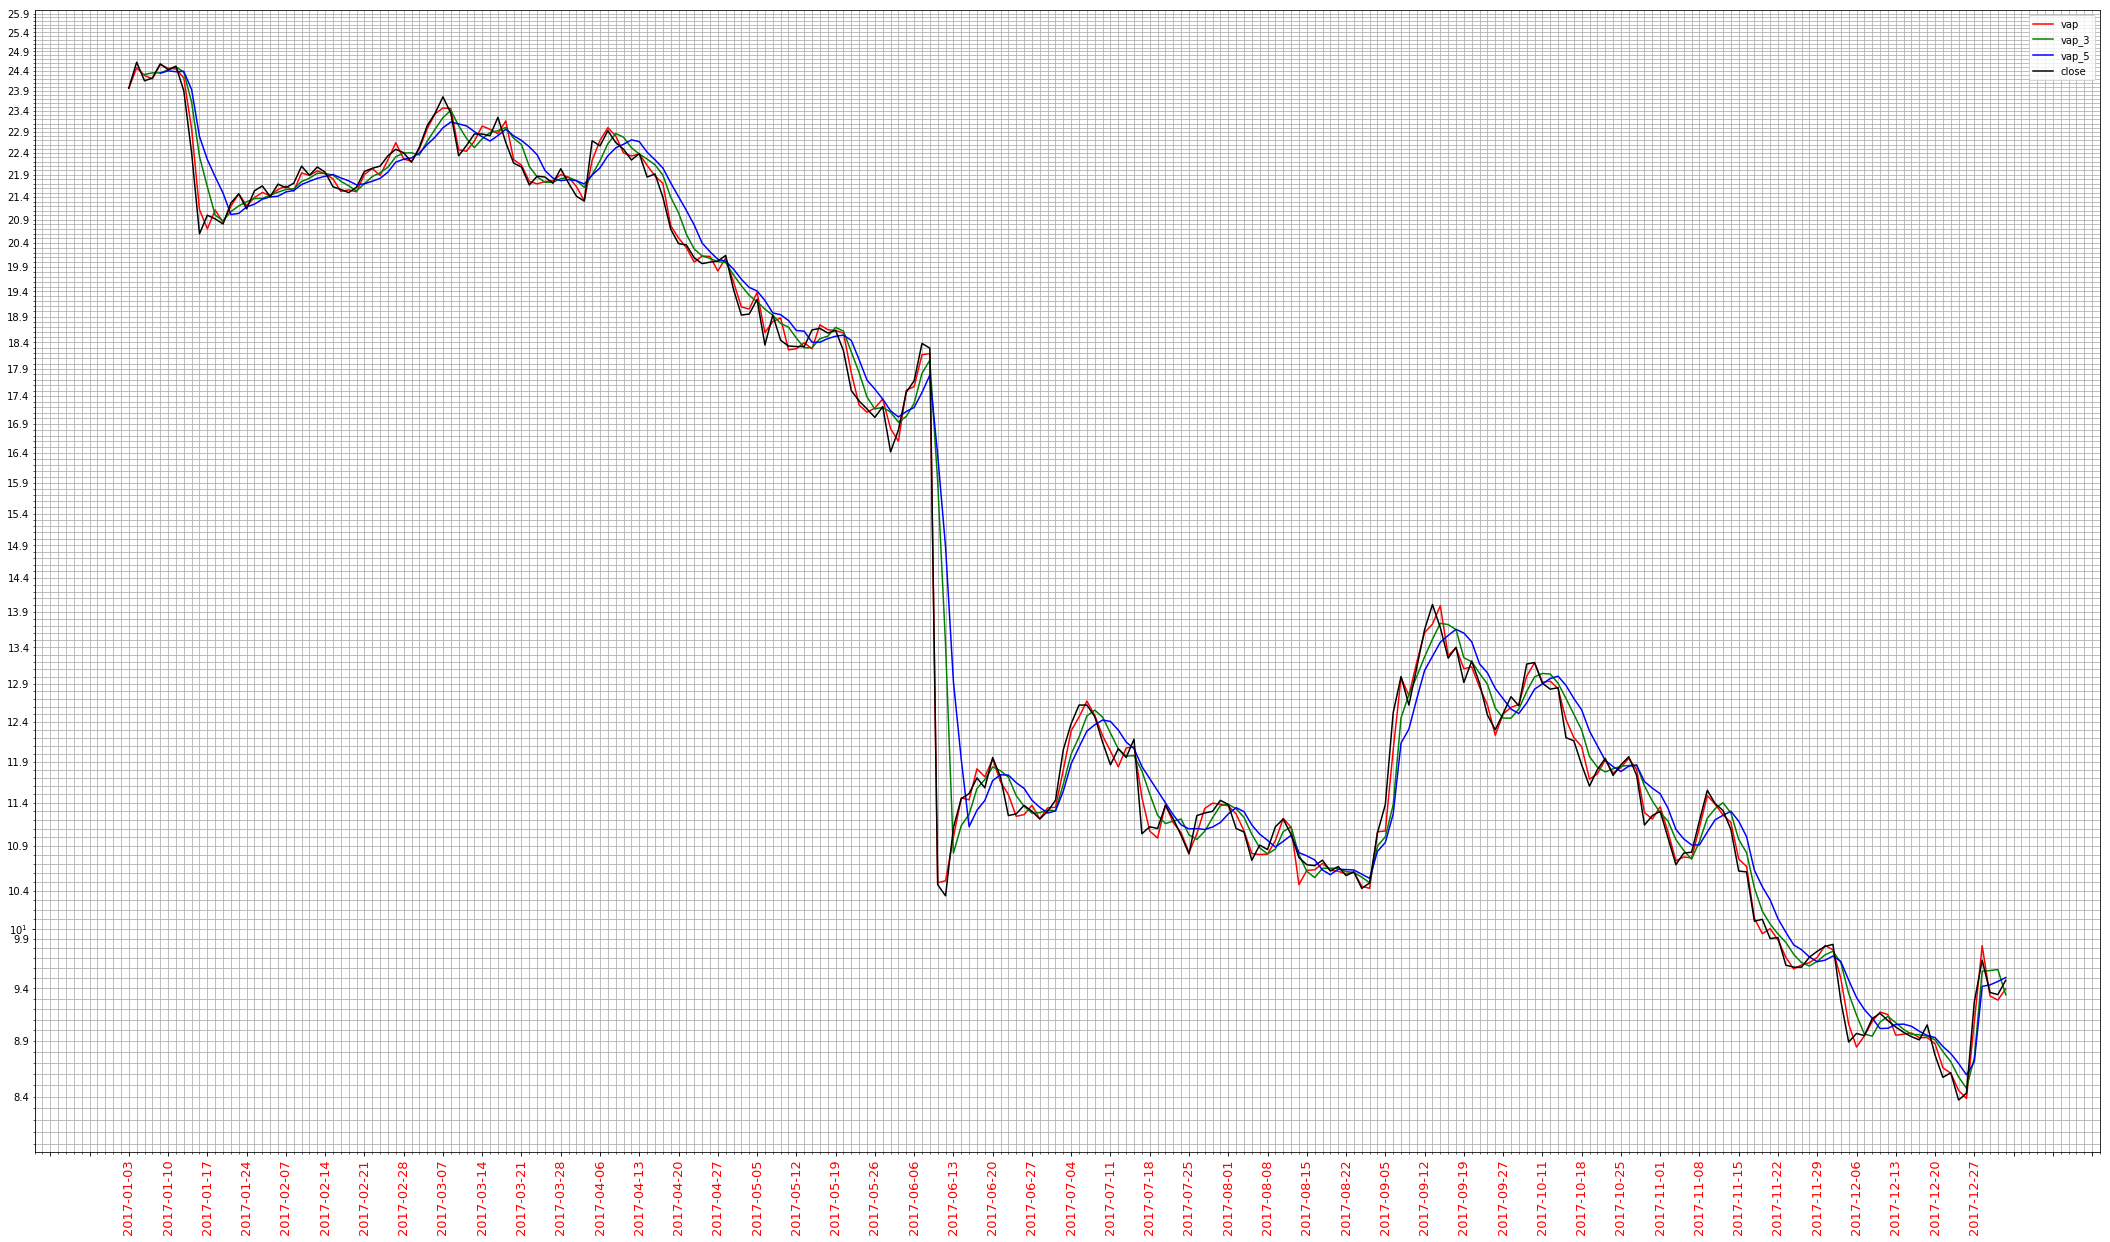

In [10]:
for stock in stock_list:
    csv_name='%s_%s.csv'%(stock,current_date_str)
    csv_path=os.path.join('/media/demon/DATA/workspace/code/git/python/stock/data',current_date_str,csv_name)
    df = pd.read_csv(csv_path)
    df = df.set_index('date')
    df_=df[::-1]
    df_=df_.assign(vap=df_['amount']*100/df_['volume'])
    rolling_3=df_[['amount','volume']].rolling(3).sum()
    rolling_5=df_[['amount','volume']].rolling(5).sum()
    df_=df_.assign(vap_3=rolling_3['amount']*100/rolling_3['volume'],
           vap_5=rolling_5['amount']*100/rolling_5['volume'])
    plt_vap=df_.vap.values
    plt_vap_3=df_.vap_3.values
    plt_vap_5=df_.vap_5.values
    plt_close=df_.close.values
    plt_p_change_rate=df_.p_change_rate.values
    xticks=df_.vap.index.values
    print(plt_vap.size,plt_close.size,xticks.size)
    
    def xformatter(v,pos):
        if v >= xticks.size or v<0:
            return ''
        return xticks[int(v)]

    def yformatter(v,pos):
        if pos%5==0:
            return str(v)
        return ''
    
    plt.close()
    fig=plt.figure(figsize=(100,15))
    plt.semilogy([i for i in range(plt_vap.size)],plt_vap,'r',label='vap'),
    plt.semilogy([i for i in range(plt_vap_3.size)],plt_vap_3,'g',label='vap_3')
    plt.semilogy([i for i in range(plt_vap_5.size)],plt_vap_5,'b',label='vap_5')
    # plt.plot([i for i in range(plt_p_change_rate.size)],plt_p_change_rate,'k',label='price_change')
    plt.semilogy([i for i in range(plt_close.size)],plt_close,'k',label='close')
    xaxis = plt.gca().xaxis
    yaxis = plt.gca().yaxis
    for label in xaxis.get_ticklabels():
        label.set_color("red")
        label.set_rotation(90)
        label.set_fontsize(13)
    xaxis.set_major_formatter(FuncFormatter(xformatter))
    xaxis.set_major_locator(MultipleLocator(5))
    xaxis.set_minor_locator(MultipleLocator(1))
    yaxis.set_minor_locator(MultipleLocator(0.1))
    yaxis.set_minor_formatter(FuncFormatter(yformatter))
    plt.grid(which='minor')
    plt.legend()
    png_name='%s_%s.png'%(stock,current_date_str)
    png_path=os.path.join('/media/demon/DATA/workspace/code/git/python/stock/data',current_date_str,png_name)
    fig.set_size_inches(37, 21)
    fig.savefig(png_path, dpi=150)

In [7]:
def prediction():                                                                              
    with tf.name_scope('hidden1'):
        weights = tf.Variable(tf.truncated_normal([85, 70],stddev=1.0 / math.sqrt(float(85))),name='weights')
        biases = tf.Variable(tf.zeros([70]),name='biases')
        hidden1 = tf.nn.tanh(tf.matmul(features_placeholder, weights) + biases)
    with tf.name_scope('hidden2'):
        weights = tf.Variable(
            tf.truncated_normal([70, 20],stddev=1.0 / math.sqrt(float(70))),name='weights')
        biases = tf.Variable(tf.zeros([20]),name='biases')
        hidden2 = tf.nn.tanh(tf.matmul(hidden1, weights) + biases)
    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(tf.truncated_normal([20, 2],stddev=1.0 / math.sqrt(float(20))),name='weights')
        biases = tf.Variable(tf.zeros([2]),name='biases')
        logits = tf.matmul(hidden2, weights) + biases
    return logits

In [38]:
predic=prediction()
sess=tf.Session()
saver = tf.train.Saver(tf.global_variables())

In [42]:
positive_samples=df_002024[df_002024.p_change_rate>=3]

In [43]:
positive_samples.index.size


526

In [39]:
c1=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
id(c1[0])

139759788700616

In [40]:
saver.restore(sess,'/tmp/tensorflow/stock/logs/fully_connected_feed/model.ckpt-399999')

INFO:tensorflow:Restoring parameters from /tmp/tensorflow/stock/logs/fully_connected_feed/model.ckpt-399999


NotFoundError: Key hidden1_2/biases not found in checkpoint
	 [[Node: save_2/RestoreV2_4 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_2/Const_0_0, save_2/RestoreV2_4/tensor_names, save_2/RestoreV2_4/shape_and_slices)]]

Caused by op 'save_2/RestoreV2_4', defined at:
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-150a783b3c63>", line 3, in <module>
    saver = tf.train.Saver(tf.global_variables())
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1218, in __init__
    self.build()
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 751, in _build_internal
    restore_sequentially, reshape)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 427, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 267, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 1021, in restore_v2
    shape_and_slices=shape_and_slices, dtypes=dtypes, name=name)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/tr/bin/anaconda2/envs/python3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key hidden1_2/biases not found in checkpoint
	 [[Node: save_2/RestoreV2_4 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_save_2/Const_0_0, save_2/RestoreV2_4/tensor_names, save_2/RestoreV2_4/shape_and_slices)]]


In [7]:
c1=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
id(c1[0])

139759788700616

In [8]:
sess.run(c1[0])

array([[-0.45168322,  0.06217299,  0.10346707, ..., -0.22709051,
        -0.05904644, -0.19645779],
       [-0.59765327,  0.05886054,  0.13266027, ..., -0.37125432,
         0.01392381, -0.34523502],
       [-0.19922237, -0.11970512, -0.1882323 , ..., -0.13983151,
        -0.07576643,  0.4553189 ],
       ..., 
       [ 0.51479733, -0.06777219, -0.23702817, ..., -0.06381192,
         0.03805336,  0.06818637],
       [ 0.65624684, -0.26029259,  0.1534306 , ...,  0.19288521,
        -0.15269576,  0.09754656],
       [-0.3069599 ,  0.42965773,  0.21626836, ..., -0.59415472,
        -0.25250575,  0.29632926]], dtype=float32)

In [9]:
sess.run(c1[4])

array([[-1.15011621,  1.16808105],
       [ 1.22168839, -1.20336699],
       [-1.70385015,  1.53471136],
       [-0.89946067,  0.37252653],
       [ 1.43345237, -1.34937906],
       [ 1.95745897, -1.59826064],
       [ 0.46279502, -0.41671622],
       [ 0.58406299, -0.63129938],
       [ 2.50310421, -2.88839674],
       [-0.79373997,  0.83299905],
       [-2.53463173,  2.39857674],
       [ 2.80531144, -2.57007313],
       [-3.20264316,  3.50598884],
       [ 0.77303743, -0.82189441],
       [ 3.00011134, -2.56888008],
       [-0.00606851, -0.47558758],
       [ 1.05219495, -1.07342875],
       [ 3.20052028, -3.24297476],
       [-3.42728281,  3.50016117],
       [-2.0049057 ,  2.10339546]], dtype=float32)

In [26]:
data=df_002024_norm['20171215':'20161124']
features=[]
lables=[]
date=[]
for index in range(data.index.size):
    slice=data[data.index.size-6-index:data.index.size-index]
    if(slice.index.size<6):
        break
    features.append(slice[1:6].values.flatten())
    date.append(slice.index[0])
    if (slice.close[0]-slice.close[1])/slice.close[1]>0.03:
        lables.append(0)
    else:
        lables.append(1)


In [27]:
len(features)

252

In [28]:
a=sess.run(predic,{features_placeholder:features})


In [29]:
a

array([[ -2.36610246e+00,   1.73942602e+00],
       [ -2.03243518e+00,   1.73028445e+00],
       [ -6.32492733e+00,   6.21444416e+00],
       [  4.74057853e-01,  -7.47891605e-01],
       [  3.99879038e-01,  -5.52644670e-01],
       [ -3.92133689e+00,   4.21936131e+00],
       [ -3.61644769e+00,   3.56522346e+00],
       [ -6.38594675e+00,   6.19595289e+00],
       [ -2.73593473e+00,   3.83015251e+00],
       [ -5.36424100e-01,   5.81047237e-01],
       [  1.49359062e-01,  -3.03293914e-02],
       [ -2.85238838e+00,   1.48153448e+00],
       [ -1.12300944e+00,   5.49993098e-01],
       [ -4.79317665e+00,   4.33680868e+00],
       [ -3.82731628e+00,   3.26588178e+00],
       [ -2.73616242e+00,   1.90545857e+00],
       [ -2.51169372e+00,   1.16377246e+00],
       [ -2.43764424e+00,   1.27129102e+00],
       [ -3.75481582e+00,   2.48554945e+00],
       [ -4.23797655e+00,   2.99590945e+00],
       [ -2.71673155e+00,   1.68792248e+00],
       [ -2.09319949e+00,   9.71675456e-01],
       [ -

In [30]:
for i in range(a.shape[0]):
    y = np.exp(a[i])
    y1=y[0]/y.sum()
    y2=y[1]/y.sum()
    print(date[i],y1,y2)

20161201 0.0162141 0.983786
20161202 0.0226935 0.977306
20161205 3.58277e-06 0.999996
20161206 0.772406 0.227594
20161207 0.721622 0.278378
20161208 0.000291349 0.999709
20161209 0.000759818 0.99924
20161212 3.43359e-06 0.999997
20161213 0.00140532 0.998595
20161214 0.246481 0.753519
20161215 0.544802 0.455198
20161216 0.0129462 0.987054
20161219 0.158024 0.841976
20161220 0.000108355 0.999892
20161221 0.000830047 0.99917
20161222 0.00954997 0.99045
20161223 0.0247115 0.975289
20161226 0.0239175 0.976083
20161227 0.00194535 0.998055
20161228 0.00072119 0.999279
20161229 0.0120728 0.987927
20161230 0.0445796 0.95542
20170103 0.00342479 0.996575
20170104 0.00148138 0.998519
20170105 0.0588054 0.941195
20170106 0.0283018 0.971698
20170109 0.015414 0.984586
20170110 0.0991535 0.900846
20170111 0.0117926 0.988207
20170112 0.0486121 0.951388
20170113 0.00197464 0.998025
20170116 0.00072511 0.999275
20170117 0.018367 0.981633
20170118 0.0222493 0.977751
20170119 0.00152314 0.998477
20170120 0

In [ ]:
sess.run(c1[0])

In [ ]:
sess.run(c1[1])

In [ ]:
sess.run(c1[2])

In [ ]:
sess.run(c1[3])

In [ ]:
sess.run(c1[4])

In [ ]:
sess.run(c1[5])

In [ ]:
id(c1)

In [ ]:
saver.restore(sess,'/tmp/tensorflow/stock/logs/fully_connected_feed/model.ckpt-399999')
c1=tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
id(c1)